In [1]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


___

In [2]:
#@title Import Libraries
#Data Manipulation & Analysis 
import pandas as pd
import numpy as np

#Data Visualisation
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
pd.set_option('max_colwidth',2000)

In [3]:
#Check Requirements
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh                         2.3.3
branca

___

In [4]:
#@title Read Datasets
dfEng = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/DSPEnglishTweetsCleaned.pkl')
dfMly = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/DSPMalayTweetsCleaned.pkl')

___

In [5]:
#@title Exploration
dfEng.head()

,Tweets,flood_related,neutral,positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment
0,continue read priv acc nga flood qrts ko,0,0,1,0,0,1,0,1,0,0,0,1,positive
1,thank opportunity flood lens option doge,0,0,1,0,0,1,0,1,0,0,0,0,positive
2,do flood tear laugh,0,0,1,0,0,1,0,0,1,0,0,0,positive
3,go coast coastal flood warn hope die,0,0,1,0,0,1,0,1,1,1,1,1,positive
4,since see flood timeline,0,1,0,0,0,0,0,0,0,0,0,0,neutral


In [6]:
dfMly.head()

,Tweets,flood_related,neutral,positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment
0,mangsa khidmat brader sebar,1,0,0,1,0,0,0,1,0,0,0,0,negative
1,sulit coba l terobos banjir lintas peureulak gayo lues aceh ig aceh viral,1,0,0,1,0,0,0,1,0,1,0,1,negative
2,gerak harap selamat,1,0,0,1,1,1,0,1,0,0,0,0,negative
3,pm dtg melaka dgrnya ptg lawat banjir belimbing durian tunggal jabat raja standby mat,1,0,0,1,1,0,0,1,0,0,0,0,negative
4,pergh buku gudang bookxcess lupus akibat banjir woi,1,0,0,1,1,0,0,1,0,1,0,0,negative


In [7]:
dfEng.shape

(3000, 14)

In [8]:
dfMly.shape

(3000, 14)

In [9]:
dfEng.dtypes

Tweets           object
flood_related     int64
neutral           int64
positive          int64
negative          int64
anger             int64
anticipation      int64
disgust           int64
fear              int64
joy               int64
sadness           int64
surprise          int64
trust             int64
sentiment        object
dtype: object

In [10]:
dfMly.dtypes

Tweets           object
flood_related     int64
neutral           int64
positive          int64
negative          int64
anger             int64
anticipation      int64
disgust           int64
fear              int64
joy               int64
sadness           int64
surprise          int64
trust             int64
sentiment        object
dtype: object

In [11]:
dfEng.isnull().sum()

Tweets           0
flood_related    0
neutral          0
positive         0
negative         0
anger            0
anticipation     0
disgust          0
fear             0
joy              0
sadness          0
surprise         0
trust            0
sentiment        0
dtype: int64

In [12]:
dfMly.isnull().sum()

Tweets           0
flood_related    0
neutral          0
positive         0
negative         0
anger            0
anticipation     0
disgust          0
fear             0
joy              0
sadness          0
surprise         0
trust            0
sentiment        0
dtype: int64

In [13]:
dfEng['flood_related'].value_counts()

0    1601
1    1399
Name: flood_related, dtype: int64

In [14]:
dfEng['sentiment'].value_counts()

neutral     1173
positive     997
negative     830
Name: sentiment, dtype: int64

In [15]:
dfMly['flood_related'].value_counts()

1    1684
0    1316
Name: flood_related, dtype: int64

In [16]:
dfMly['sentiment'].value_counts()

neutral     1191
negative    1063
positive     746
Name: sentiment, dtype: int64

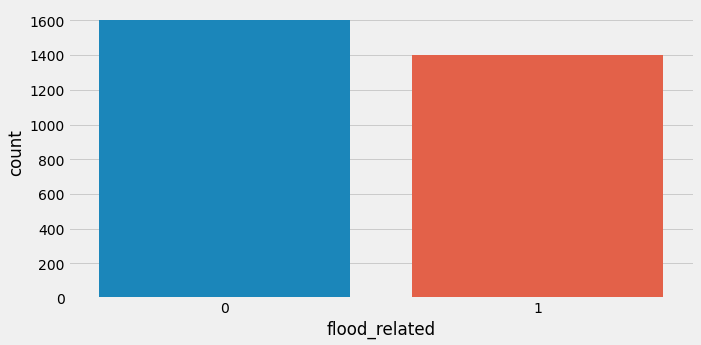

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='flood_related', data=dfEng)

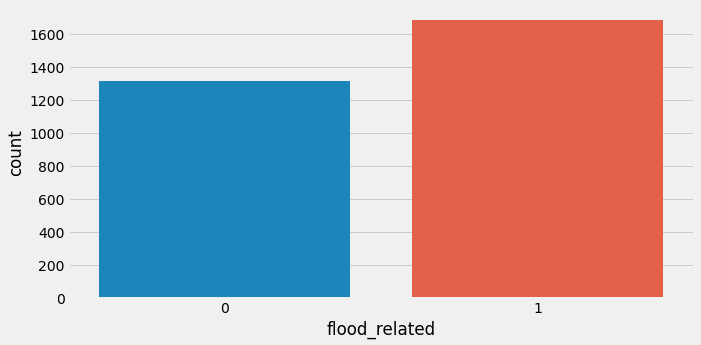

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='flood_related', data=dfMly)

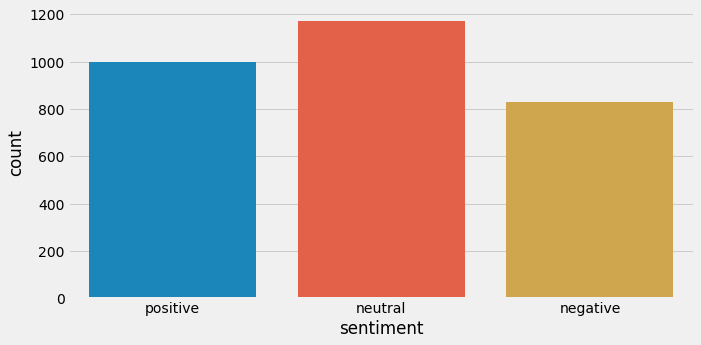

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='sentiment', data=dfEng)

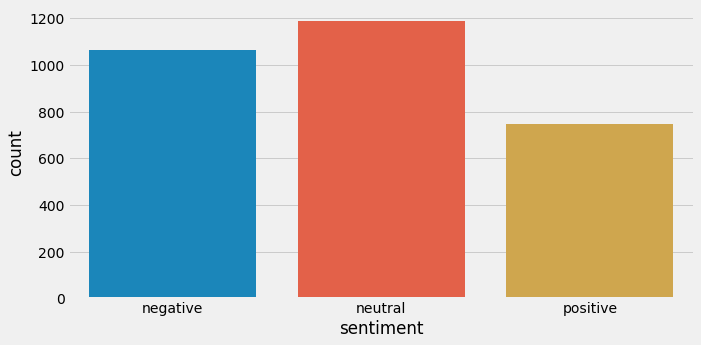

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='sentiment', data=dfMly)

In [21]:
dfEng['emotion_count'] = dfEng[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']].sum(axis='columns')

In [22]:
dfMly['emotion_count'] = dfMly[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']].sum(axis='columns')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


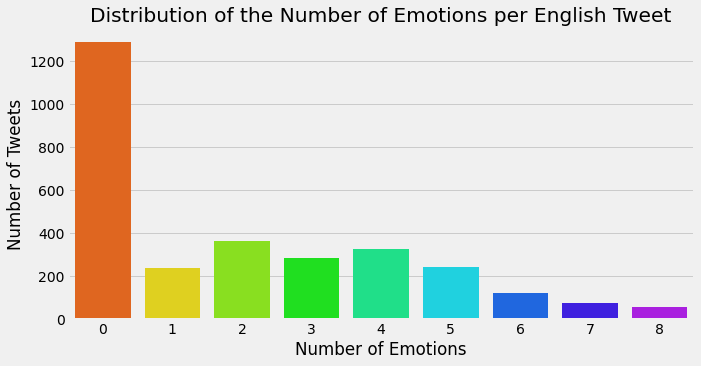

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(dfEng.emotion_count, palette='gist_rainbow')
plt.title("Distribution of the Number of Emotions per English Tweet")
plt.xlabel("Number of Emotions")
plt.ylabel("Number of Tweets")
plt.show()

In [24]:
dfEng.emotion_count.value_counts()

0    1291
2     363
4     327
3     285
5     244
1     238
6     122
7      74
8      56
Name: emotion_count, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


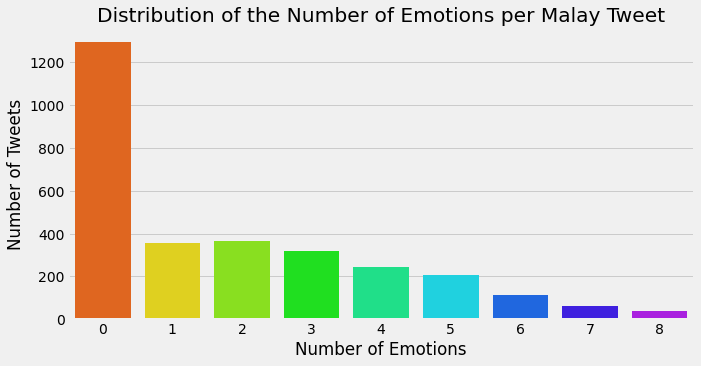

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(dfMly.emotion_count, palette='gist_rainbow')
plt.title("Distribution of the Number of Emotions per Malay Tweet")
plt.xlabel("Number of Emotions")
plt.ylabel("Number of Tweets")
plt.show()

In [26]:
dfMly.emotion_count.value_counts()

0    1295
2     365
1     357
3     317
4     242
5     207
6     113
7      64
8      40
Name: emotion_count, dtype: int64

___

# Corpus of Tweets

In [27]:
emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

In [28]:
data_english_combined = pd.DataFrame(emotion)
data_malay_combined = pd.DataFrame(emotion)

In [29]:
data_english_combined.columns = ['Emotion']
data_malay_combined.columns = ['Emotion']

In [30]:
data_english_combined["Tweets"] = ""
data_malay_combined["Tweets"] = ""
data_english_combined

,Emotion,Tweets
0,anger,
1,anticipation,
2,disgust,
3,fear,
4,joy,
5,sadness,
6,surprise,
7,trust,


In [31]:
angerdfEng = dfEng.loc[dfEng["anger"] == 1]

angerEngTweets = "".join(tweet for tweet in angerdfEng.Tweets)

condition = data_english_combined['Emotion'] == 'anger'

data_english_combined.loc[condition, 'Tweets'] = angerEngTweets

In [32]:
anticipationdfEng = dfEng.loc[dfEng["anticipation"] == 1]

anticipationEngTweets = "".join(tweet for tweet in anticipationdfEng.Tweets)

condition = data_english_combined['Emotion'] == 'anticipation'

data_english_combined.loc[condition, 'Tweets'] = anticipationEngTweets

In [33]:
disgustdfEng = dfEng.loc[dfEng["disgust"] == 1]

disgustEngTweets = "".join(tweet for tweet in disgustdfEng.Tweets)

condition = data_english_combined['Emotion'] == 'disgust'

data_english_combined.loc[condition, 'Tweets'] = disgustEngTweets

In [34]:
feardfEng = dfEng.loc[dfEng["fear"] == 1]

fearEngTweets = "".join(tweet for tweet in feardfEng.Tweets)

condition = data_english_combined['Emotion'] == 'fear'

data_english_combined.loc[condition, 'Tweets'] = fearEngTweets

In [35]:
joydfEng = dfEng.loc[dfEng["joy"] == 1]

joyEngTweets = "".join(tweet for tweet in joydfEng.Tweets)

condition = data_english_combined['Emotion'] == 'joy'

data_english_combined.loc[condition, 'Tweets'] = joyEngTweets

In [36]:
sadnessdfEng = dfEng.loc[dfEng["sadness"] == 1]

sadnessEngTweets = "".join(tweet for tweet in sadnessdfEng.Tweets)

condition = data_english_combined['Emotion'] == 'sadness'

data_english_combined.loc[condition, 'Tweets'] = sadnessEngTweets

In [37]:
surprisedfEng = dfEng.loc[dfEng["surprise"] == 1]

surpriseEngTweets = "".join(tweet for tweet in surprisedfEng.Tweets)

condition = data_english_combined['Emotion'] == 'surprise'

data_english_combined.loc[condition, 'Tweets'] = surpriseEngTweets

In [38]:
trustdfEng = dfEng.loc[dfEng["trust"] == 1]

trustEngTweets = "".join(tweet for tweet in trustdfEng.Tweets)

condition = data_english_combined['Emotion'] == 'trust'

data_english_combined.loc[condition, 'Tweets'] = trustEngTweets
data_english_combined

,Emotion,Tweets
0,anger,actually feel bad pray rain sleep peacefully meanwhile ste laand experience flood kid go school tomorrow yet home fill water miss first half game mini flood kitchen adulting home repair really inconvenient sometimes pre covid life already hard come hurricane name corona flood destroy everything work hard next pandemic mental illness flood timeline niner fit god damn facebook minute premier announce positive change gender choice dl nasty loser bitch cost tax payer money go flood victim nvm article point save taxpayer money def move texas nice place visit get flood hurricane snow storm top road look earthquake happen fuck crazy apartment flood crackheads upstairs wan na burst frozen pipe even claim old room back mother house night everyone callin earthquake flood insurance tomorrow tonga volcano capital tonga king palace hit seriously hard flood go flood cowboy stadium damn tear whodat write story personal publish hate happen always control word flood onto page late worth read thread ago god tell noah build ark go worldwide flood nephilims walk earth back day giant steal men wife corrupt human gene pool hey donelle house much house bay window galley kitchen fireplace insert hotel type bathroom august flood make sure remodel house oh bad roof hurricane ida make sure replaced please help flood friend timeline difficult pain loss love solidarity incredibly painful phase life ever notice bible powerful could house fire tornado flood whatever go show power god rumor little tiger feel ready pounce imagine sit completely control trance taiga small body circle eye roll back watch reality flood back sharp kick ball ocean volcano erupts earthquake midwest east coast flood polar vortex excessive heat endless pandemic kind get biblical day fight flood fight win silly doctor devil come flood lord raise standard moment drown head thank save really hat northern nj flood overnight g n january point want flood cum daily look lens cum shit heartbreaking use money save master degree...
1,anticipation,continue read priv acc nga flood qrts ko thank opportunity flood lens option doge do flood tear laugh go coast coastal flood warn hope die check wordle find inventor wardle love girl friend st attempt line fail second wish flood twitter result end happy th birthday flash flood colour favourite album oh happy birthday fella actually feel bad pray rain sleep peacefully meanwhile ste laand experience flood kid go school tomorrow yet home fill water love parent finish watching mandalorian flood question every aspect star war inner love come explain detail nobody leave flood god please let get covid god forgive god damn facebook minute premier announce positive change gender choice dl nasty loser bitch cost tax payer money go flood victim nvm article point save taxpayer money forgot dance wish voyage come playlist flood memory rush def move texas nice place visit get flood hurricane snow storm top road look earthquake happen repeat client call flood home furniture clean asap unexpected end sunday funday get back nap flood get bad hurricane get bad wildfire get bad storm get bad invest climate action late everyone callin earthquake flood insurance tomorrow nothing good flood zhongli post excite dem boyz meme flood twitter worth read thread ago god tell noah build ark go worldwide flood nephilims walk earth back day giant steal men wife corrupt human gene pool please help flood friend timeline difficult pain loss love solidarity incredibly painful phase life ever notice bible powerful could house fire tornado flood whatever go show power god rumor little tiger feel ready pounce imagine sit completely control trance taiga small body circle eye roll back watch reality flood back sharp kick ball new moot hello guy completely flood switch hope old forever mutuals get overshadow see feed full exols celebrate exo win beautiful scene see flood happy pay fight flood fight win silly doctor flood detroit food mid fuck take long probably go back

In [39]:
angerdfMly = dfMly.loc[dfMly["anger"] == 1]

angerMlyTweets = "".join(tweet for tweet in angerdfMly.Tweets)

condition = data_malay_combined['Emotion'] == 'anger'

data_malay_combined.loc[condition, 'Tweets'] = angerMlyTweets

In [40]:
anticipationdfMly = dfMly.loc[dfMly["anticipation"] == 1]

anticipationMlyTweets = "".join(tweet for tweet in anticipationdfMly.Tweets)

condition = data_malay_combined['Emotion'] == 'anticipation'

data_malay_combined.loc[condition, 'Tweets'] = anticipationMlyTweets

In [41]:
disgustdfMly = dfMly.loc[dfMly["disgust"] == 1]

disgustMlyTweets = "".join(tweet for tweet in disgustdfMly.Tweets)

condition = data_malay_combined['Emotion'] == 'disgust'

data_malay_combined.loc[condition, 'Tweets'] = disgustMlyTweets

In [42]:
feardfMly = dfMly.loc[dfMly["fear"] == 1]

fearMlyTweets = "".join(tweet for tweet in feardfMly.Tweets)

condition = data_malay_combined['Emotion'] == 'fear'

data_malay_combined.loc[condition, 'Tweets'] = fearMlyTweets

In [43]:
joydfMly = dfMly.loc[dfMly["joy"] == 1]

joyMlyTweets = "".join(tweet for tweet in joydfMly.Tweets)

condition = data_malay_combined['Emotion'] == 'joy'

data_malay_combined.loc[condition, 'Tweets'] = joyMlyTweets

In [44]:
sadnessdfMly = dfMly.loc[dfMly["sadness"] == 1]

sadnessMlyTweets = "".join(tweet for tweet in sadnessdfMly.Tweets)

condition = data_malay_combined['Emotion'] == 'sadness'

data_malay_combined.loc[condition, 'Tweets'] = sadnessMlyTweets

In [45]:
surprisedfMly = dfMly.loc[dfMly["surprise"] == 1]

surpriseMlyTweets = "".join(tweet for tweet in surprisedfMly.Tweets)

condition = data_malay_combined['Emotion'] == 'surprise'

data_malay_combined.loc[condition, 'Tweets'] = surpriseMlyTweets

In [46]:
trustdfMly = dfMly.loc[dfMly["trust"] == 1]

trustMlyTweets = "".join(tweet for tweet in trustdfMly.Tweets)

condition = data_malay_combined['Emotion'] == 'trust'

data_malay_combined.loc[condition, 'Tweets'] = trustMlyTweets
data_malay_combined

,Emotion,Tweets
0,anger,gerak harap selamatpm dtg melaka dgrnya ptg lawat banjir belimbing durian tunggal jabat raja standby matpergh buku gudang bookxcess lupus akibat banjir woiuji uji timpa percaya uji jua jaga arus banjir uji landa jom gapai sinar cahaya kaburleh rturn gj ditggung musnah dek krakusan krasukan nfsu tamakhaloba sape gnti rmh nih brpluh thn bribu ampun ditggung hrta dajjal kturunan prnh kluar pn dri istana john labukejam susah susah pimpin harap kambing hitam kitetaknak kutip beli al quran donate drop al quran masjid weekend mak pergi hulu langat serah al quran donate masjid al muqarobin tasikmanusia durjana ambil sempat biar rakus khianat pokok hutan benteng manusia bencanabuah buku paksa musnah gudang bookxcess akibat banjir landa sember cinta buku mesti tengokbeza azwan omar noh omar azwan omar gegar xkira bangsa noh omar sembangnya degar habokpon takdeeepakcik kesi cicak fitnahviral mehh viralkan tissue pulak masjid al falah mangsa tissue ambilharap bendera haritu batang bendera patah ketar nampak tegurterkadang papa kesi jab raja paksa backup alas normal banjir cuci cuci taikmain ceduk pastu campak then pass scope belah camtu keje selesai bersih sikap moral pm tonjol bawak segerobolan prompt camera wartawan contents pm touristsbanjir bentong mintak bentong sumbang tin spray nyamuk kpd duduk tmn harmoni benus cheka medang nyamuk banyok woo banjir sampah longgok pic bantuserius najis unggas cicak jawapan byk jurufoto juruvideo pilih posing cantik hello next week bodoh hahahahahahahahahahahahahahagelak baca nyata backup rina cuci najis unggas cicak aduh penat cuci pergi cuci benda nyata troll official fb aduhai malaysiakusalur bukti gerak musim bencanapenat lari cari barang mangsa banjir cari mak photo ops cuci kaw banjir bersih darah mulut gaji puluh ribu ambik gambarbudak bonsai fikiran kecik layan lagu main api teach them salahnyawa tunggu gila priority ambulance waknatrm huhu gerak pecah huhu lokasi puom jelebumasuk banjir landa skrg pps situasi gambar piliharan...
1,anticipation,gerak harap selamatselimut elok message mahal bajet had kurang stok selimut mangsa banjir melaka drop off pv esok agihalert ban rtb bukit changgang pecah be awaretrend sungai awas risiko banjirkejam susah susah pimpin harap kambing hitam kitelat rancang kite lalai yopp facebooksebar jejas banjir mohon tangguh bayar pinjam ptptn kelulus mohon keluartaknak kutip beli al quran donate drop al quran masjid weekend mak pergi hulu langat serah al quran donate masjid al muqarobin tasikmanusia durjana ambil sempat biar rakus khianat pokok hutan benteng manusia bencanaalhamdulillah terima kasih long kurang beban mangsa banjirmain ceduk pastu campak then pass scope belah camtu keje selesai bersih sikap moral pm tonjol bawak segerobolan prompt camera wartawan contents pm touristsbanding banjir pekat benak diorg laa padang cuci pps ppspenat lari cari barang mangsa banjir cari mak photo ops cuci kaw banjir bersih darah mulut gaji puluh ribu ambik gambarbudak bonsai fikiran kecik layan lagu main api teach them salahnyawa tunggu gila priority ambulance waknatbantu bantu bukti landa buang negatif benci sayang hidup susah senangacah penat tengok esok penat serious free meh batu kapor mentakabjkom macai raja royan gelabah hala rana amuk dsai mubarai cuci crew on the move harap puchong tabah seriau dengar dadacats adoption thread pic usj mangsa banjir muda kategori bulus comel bawa pergi vet checkup selesema all spayed new ownerassalamualaikum kawan salah mangsa banjir hulu langat atok lantar sakit katil hospital pulih siapa pinjam sewa roger sebarurgent help bantu mangsa banjir bantu total lost kosong tilam bantal donate familysmlm tlg cuci mangsa banjir permata peluk hebat rosniza lukis pamer istana alhamdulillah lukis survived the flood wak on oxygen sakit long covid if anyone donate him dm mebencana banjir tragedi piala aff sedia sungguh sungguh sediaguys kedai water jet kembang viral waze ah online signboard cakap aik huat hardware confusing 

In [47]:
#View anger Tweets
condition = data_english_combined['Emotion'] == 'anger'
data_english_combined.loc[condition, 'Tweets']

0    actually feel bad pray rain sleep peacefully meanwhile ste laand experience flood kid go school tomorrow yet home fill water miss first half game mini flood kitchen adulting home repair really inconvenient sometimes pre covid life already hard come hurricane name corona flood destroy everything work hard next pandemic mental illness flood timeline niner fit god damn facebook minute premier announce positive change gender choice dl nasty loser bitch cost tax payer money go flood victim nvm article point save taxpayer money def move texas nice place visit get flood hurricane snow storm top road look earthquake happen fuck crazy apartment flood crackheads upstairs wan na burst frozen pipe even claim old room back mother house night everyone callin earthquake flood insurance tomorrow tonga volcano capital tonga king palace hit seriously hard flood go flood cowboy stadium damn tear whodat write story personal publish hate happen always control word flood onto page late worth read threa

In [48]:
#@title Export Corpus as .pkl format
data_english_combined.to_pickle("DSPEnglishTweetsCorpus.pkl")
data_malay_combined.to_pickle("DSPMalayTweetsCorpus.pkl")

___

# Document-Term Matrix

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

english_cv = CountVectorizer(stop_words='english')
english_data_cv = english_cv.fit_transform(data_english_combined.Tweets)
english_data_dtm = pd.DataFrame(english_data_cv.toarray(), columns=english_cv.get_feature_names_out())
english_data_dtm.index = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
english_data_dtm

,aa,aaa,aaaa,aaaahhh,aai,aaj,aamiin,aamin,ab,abadi,...,zhongli,zikianza,zine,zip,zombie,zone,zoom,zubear,zuwerah,zzz
anger,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,3,0,0,0,0
anticipation,1,1,1,1,1,1,1,3,1,0,...,1,0,1,1,2,3,1,1,0,0
disgust,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,3,0,0,0,0
fear,1,1,0,1,1,1,0,3,1,0,...,1,1,1,1,2,3,1,0,1,1
joy,0,2,1,0,1,1,1,3,1,0,...,1,0,1,1,1,2,1,2,0,0
sadness,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2,3,0,0,0,0
surprise,0,0,0,0,0,1,0,3,1,0,...,1,0,0,1,2,3,1,0,0,0
trust,0,1,1,0,1,1,1,3,1,1,...,1,0,0,1,2,2,1,2,1,1


In [50]:
malay_cv = CountVectorizer()
malay_data_cv = malay_cv.fit_transform(data_malay_combined.Tweets)
malay_data_dtm = pd.DataFrame(malay_data_cv.toarray(), columns=malay_cv.get_feature_names_out())
malay_data_dtm.index = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
malay_data_dtm

,aaa,aaaaa,aaauthor,aamiin,aamiinabis,aamiinahok,aamiinallah,aamiinara,aamiinbangun,aamiinbayang,...,yuuukkner,yuuuukk,zahrana,zaidah,zailan,zaiyi,zalim,zaman,zarahmati,zon
anger,0,0,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
anticipation,1,2,1,7,1,0,2,0,0,0,...,0,1,1,1,0,1,1,3,0,1
disgust,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
fear,1,1,0,5,0,0,2,1,1,0,...,0,0,1,1,2,1,2,3,1,1
joy,0,2,1,7,1,0,2,0,0,0,...,1,1,1,0,2,1,1,2,0,0
sadness,0,0,0,2,0,0,0,0,0,0,...,0,0,0,1,0,0,2,1,0,0
surprise,0,1,0,6,0,1,1,0,0,1,...,0,0,0,1,0,1,1,2,0,1
trust,0,2,1,8,1,0,2,0,0,0,...,0,1,0,1,2,1,1,2,0,1


In [51]:
#@title Export Matrix as .pkl format
english_data_dtm.to_pickle("DSPEnglishTweetsDTM.pkl")
malay_data_dtm.to_pickle("DSPMalayTweetsDTM.pkl")

___

# Remove Common Words

In [52]:
english_data = pd.read_pickle('DSPEnglishTweetsDTM.pkl')
english_data = english_data.transpose()
english_data

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
aa,1,1,0,1,0,1,0,0
aaa,1,1,1,1,2,1,0,1
aaaa,0,1,0,0,1,0,0,1
aaaahhh,0,1,0,1,0,0,0,0
aai,1,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...
zone,3,3,3,3,2,3,3,2
zoom,0,1,0,1,1,0,1,1
zubear,0,1,0,0,2,0,0,2
zuwerah,0,0,0,1,0,0,0,1


In [53]:
#Top 30 words of each Emotion
english_top_dict = {}
for c in english_data.columns:
    top = english_data[c].sort_values(ascending=False).head(30)
    english_top_dict[c] = list(zip(top.index, top.values))

english_top_dict

{'anger': [('flood', 379),
  ('help', 104),
  ('come', 47),
  ('day', 43),
  ('bad', 43),
  ('feel', 34),
  ('victim', 34),
  ('pls', 32),
  ('make', 30),
  ('let', 30),
  ('word', 29),
  ('love', 28),
  ('stay', 27),
  ('house', 27),
  ('hit', 27),
  ('life', 27),
  ('spread', 26),
  ('malaysia', 26),
  ('shit', 25),
  ('money', 24),
  ('really', 24),
  ('say', 23),
  ('government', 23),
  ('water', 22),
  ('think', 21),
  ('god', 21),
  ('start', 20),
  ('today', 20),
  ('want', 20),
  ('guy', 20)],
 'anticipation': [('flood', 689),
  ('help', 151),
  ('come', 89),
  ('god', 86),
  ('let', 65),
  ('day', 65),
  ('love', 61),
  ('safe', 60),
  ('hope', 59),
  ('good', 59),
  ('pray', 54),
  ('stay', 47),
  ('urgent', 47),
  ('today', 44),
  ('think', 43),
  ('wait', 42),
  ('start', 42),
  ('make', 41),
  ('victim', 38),
  ('water', 38),
  ('bad', 38),
  ('life', 37),
  ('feel', 36),
  ('tweet', 36),
  ('send', 35),
  ('open', 35),
  ('guy', 34),
  ('rain', 34),
  ('new', 34),
  ('hap

In [54]:
#Top 15 words of each Emotion
for emotion, top_words in english_top_dict.items():
    print(emotion)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('-------')

anger
flood, help, come, day, bad, feel, victim, pls, make, let, word, love, stay, house
-------
anticipation
flood, help, come, god, let, day, love, safe, hope, good, pray, stay, urgent, today
-------
disgust
flood, help, bad, come, feel, lord, day, make, shit, say, love, water, let, god
-------
fear
flood, help, come, love, day, let, god, victim, make, bad, open, tweet, stay, pls
-------
joy
flood, safe, stay, help, love, god, let, hope, day, good, come, pray, pls, tweet
-------
sadness
flood, help, bad, victim, feel, day, come, pls, make, lose, let, send, rain, area
-------
surprise
flood, help, hope, good, urgent, pray, let, come, day, safe, feel, love, birthday, tweet
-------
trust
flood, safe, help, stay, god, love, let, come, day, hope, good, pray, pls, guy
-------


In [55]:
from collections import Counter

english_words = []
for emotions_common in english_data.columns:
    top = [word for (word, count) in english_top_dict[emotions_common]]
    for t in top:
        english_words.append(t)

#Count appearances in different Emotions
Counter(english_words).most_common()

[('flood', 8),
 ('help', 8),
 ('come', 8),
 ('day', 8),
 ('feel', 8),
 ('let', 8),
 ('love', 8),
 ('stay', 8),
 ('water', 8),
 ('victim', 7),
 ('make', 7),
 ('think', 7),
 ('god', 7),
 ('want', 7),
 ('guy', 7),
 ('bad', 6),
 ('pls', 6),
 ('malaysia', 6),
 ('today', 6),
 ('tweet', 6),
 ('open', 6),
 ('life', 5),
 ('really', 5),
 ('say', 5),
 ('safe', 5),
 ('pray', 5),
 ('rain', 5),
 ('hope', 4),
 ('good', 4),
 ('send', 4),
 ('house', 3),
 ('government', 3),
 ('start', 3),
 ('allah', 3),
 ('shit', 2),
 ('money', 2),
 ('urgent', 2),
 ('new', 2),
 ('try', 2),
 ('right', 2),
 ('area', 2),
 ('post', 2),
 ('malaysian', 2),
 ('emergency', 2),
 ('word', 1),
 ('hit', 1),
 ('spread', 1),
 ('wait', 1),
 ('happen', 1),
 ('lord', 1),
 ('disaster', 1),
 ('damn', 1),
 ('sorry', 1),
 ('gate', 1),
 ('friend', 1),
 ('lose', 1),
 ('affect', 1),
 ('muda', 1),
 ('birthday', 1),
 ('rescue', 1)]

In [56]:
#Remove as Stop Word if appear in more than half of Emotions
english_add_stop_words = [word for word, count in Counter(english_words).most_common() if count > 4]
english_add_stop_words

['flood',
 'help',
 'come',
 'day',
 'feel',
 'let',
 'love',
 'stay',
 'water',
 'victim',
 'make',
 'think',
 'god',
 'want',
 'guy',
 'bad',
 'pls',
 'malaysia',
 'today',
 'tweet',
 'open',
 'life',
 'really',
 'say',
 'safe',
 'pray',
 'rain']

In [57]:
#Update Document-Term Matrix
from sklearn.feature_extraction import text

english_data_clean = pd.read_pickle('DSPEnglishTweetsCorpus.pkl')
english_stop_words = text.ENGLISH_STOP_WORDS.union(english_add_stop_words)

english_cv = CountVectorizer(stop_words=english_stop_words, min_df=0.01)  #0.01~0.05 #min_df remove rare words
english_data_cv = english_cv.fit_transform(english_data_clean.Tweets)
english_data_dtm = pd.DataFrame(english_data_cv.toarray(), columns=english_cv.get_feature_names_out())
english_data_dtm.index = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
english_data_dtm

,aa,aaa,aaaa,aaaahhh,aai,aaj,aamiin,aamin,ab,abadi,...,zhongli,zikianza,zine,zip,zombie,zone,zoom,zubear,zuwerah,zzz
anger,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,3,0,0,0,0
anticipation,1,1,1,1,1,1,1,3,1,0,...,1,0,1,1,2,3,1,1,0,0
disgust,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,3,0,0,0,0
fear,1,1,0,1,1,1,0,3,1,0,...,1,1,1,1,2,3,1,0,1,1
joy,0,2,1,0,1,1,1,3,1,0,...,1,0,1,1,1,2,1,2,0,0
sadness,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2,3,0,0,0,0
surprise,0,0,0,0,0,1,0,3,1,0,...,1,0,0,1,2,3,1,0,0,0
trust,0,1,1,0,1,1,1,3,1,1,...,1,0,0,1,2,2,1,2,1,1


___

In [58]:
#@title Repeat with Malay Dataset
malay_data = pd.read_pickle('DSPMalayTweetsDTM.pkl')
malay_data = malay_data.transpose()
malay_data

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
aaa,0,1,0,1,0,0,0,0
aaaaa,0,2,1,1,2,0,1,2
aaauthor,0,1,0,0,1,0,0,1
aamiin,2,7,1,5,7,2,6,8
aamiinabis,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
zaiyi,0,1,0,1,1,0,1,1
zalim,1,1,2,2,1,2,1,1
zaman,1,3,0,3,2,1,2,2
zarahmati,0,0,0,1,0,0,0,0


In [59]:
#Top 30 words of each Emotion
malay_top_dict = {}
for c in malay_data.columns:
    top = malay_data[c].sort_values(ascending=False).head(30)
    malay_top_dict[c]= list(zip(top.index, top.values))

malay_top_dict

{'anger': [('banjir', 236),
  ('mangsa', 85),
  ('bantu', 45),
  ('allah', 38),
  ('bencana', 34),
  ('selamat', 31),
  ('and', 30),
  ('moga', 26),
  ('hujan', 25),
  ('hati', 24),
  ('salah', 24),
  ('muda', 23),
  ('taman', 23),
  ('please', 22),
  ('raja', 22),
  ('the', 21),
  ('tengok', 21),
  ('help', 20),
  ('org', 20),
  ('sedih', 19),
  ('gila', 18),
  ('ga', 17),
  ('sakit', 17),
  ('takut', 17),
  ('baca', 17),
  ('keluarga', 15),
  ('musibah', 14),
  ('budak', 13),
  ('barang', 13),
  ('jerit', 13)],
 'anticipation': [('banjir', 470),
  ('mangsa', 102),
  ('bantu', 95),
  ('moga', 90),
  ('hujan', 53),
  ('allah', 51),
  ('and', 45),
  ('selamat', 40),
  ('ga', 40),
  ('muda', 32),
  ('doa', 28),
  ('tengok', 27),
  ('hati', 27),
  ('raja', 27),
  ('the', 26),
  ('besok', 25),
  ('help', 24),
  ('sampe', 23),
  ('taman', 23),
  ('makan', 23),
  ('please', 23),
  ('tidur', 23),
  ('stay', 22),
  ('ujan', 21),
  ('tunggu', 21),
  ('bangun', 19),
  ('cepat', 19),
  ('surut', 

In [60]:
#Top 15 words of each Emotion
for emotion, top_words in malay_top_dict.items():
    print(emotion)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('-------')

anger
banjir, mangsa, bantu, allah, bencana, selamat, and, moga, hujan, hati, salah, muda, taman, please
-------
anticipation
banjir, mangsa, bantu, moga, hujan, allah, and, selamat, ga, muda, doa, tengok, hati, raja
-------
disgust
banjir, mangsa, bencana, bantu, sampah, selamat, salah, korup, allah, moga, raja, hati, ga, baca
-------
fear
banjir, mangsa, bantu, allah, moga, selamat, and, hujan, please, ga, tengok, muda, takut, help
-------
joy
banjir, moga, mangsa, bantu, allah, selamat, hujan, stay, and, safe, ga, doa, makan, hati
-------
sadness
banjir, mangsa, bantu, allah, moga, hujan, and, selamat, tengok, bencana, sedih, help, hati, ga
-------
surprise
banjir, bantu, moga, mangsa, allah, hujan, bencana, selamat, muda, doa, and, ga, taman, help
-------
trust
banjir, mangsa, moga, bantu, allah, selamat, hujan, and, stay, ga, safe, hati, makan, tengok
-------


In [61]:
malay_words = []
for emotions_common in malay_data.columns:
    top = [word for (word, count) in malay_top_dict[emotions_common]]
    for t in top:
        malay_words.append(t)

#Count appearances in different Emotions
Counter(malay_words).most_common()

[('banjir', 8),
 ('mangsa', 8),
 ('bantu', 8),
 ('allah', 8),
 ('selamat', 8),
 ('and', 8),
 ('moga', 8),
 ('hujan', 8),
 ('hati', 8),
 ('tengok', 8),
 ('ga', 8),
 ('muda', 7),
 ('taman', 7),
 ('please', 7),
 ('baca', 7),
 ('raja', 6),
 ('help', 6),
 ('stay', 6),
 ('bencana', 5),
 ('the', 5),
 ('org', 5),
 ('sedih', 5),
 ('doa', 5),
 ('salah', 4),
 ('takut', 4),
 ('besok', 4),
 ('makan', 4),
 ('tidur', 4),
 ('ujan', 4),
 ('surut', 4),
 ('safe', 4),
 ('sakit', 3),
 ('keluarga', 3),
 ('musibah', 3),
 ('sampe', 3),
 ('harap', 3),
 ('masuk', 3),
 ('banget', 3),
 ('gila', 2),
 ('jerit', 2),
 ('bangun', 2),
 ('cepat', 2),
 ('warga', 2),
 ('sampah', 2),
 ('korup', 2),
 ('mati', 2),
 ('budak', 1),
 ('barang', 1),
 ('tunggu', 1),
 ('pm', 1),
 ('bgt', 1),
 ('buang', 1),
 ('risau', 1),
 ('pls', 1),
 ('mohon', 1),
 ('emas', 1),
 ('gua', 1),
 ('sekolah', 1)]

In [62]:
#Remove as Stop Word if appear in more than half of Emotions
malay_add_stop_words = [word for word, count in Counter(malay_words).most_common() if count > 4]
malay_add_stop_words

['banjir',
 'mangsa',
 'bantu',
 'allah',
 'selamat',
 'and',
 'moga',
 'hujan',
 'hati',
 'tengok',
 'ga',
 'muda',
 'taman',
 'please',
 'baca',
 'raja',
 'help',
 'stay',
 'bencana',
 'the',
 'org',
 'sedih',
 'doa']

In [63]:
#Update Document-Term Matrix
malay_data_clean = pd.read_pickle('DSPMalayTweetsCorpus.pkl')
malay_stop_words = malay_add_stop_words

malay_cv = CountVectorizer(stop_words=malay_stop_words, min_df=0.01)  #0.01~0.05 #min_df remove rare words
malay_data_cv = malay_cv.fit_transform(malay_data_clean.Tweets)
malay_data_dtm = pd.DataFrame(malay_data_cv.toarray(), columns=malay_cv.get_feature_names_out())
malay_data_dtm.index = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
malay_data_dtm

,aaa,aaaaa,aaauthor,aamiin,aamiinabis,aamiinahok,aamiinallah,aamiinara,aamiinbangun,aamiinbayang,...,yuuukkner,yuuuukk,zahrana,zaidah,zailan,zaiyi,zalim,zaman,zarahmati,zon
anger,0,0,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
anticipation,1,2,1,7,1,0,2,0,0,0,...,0,1,1,1,0,1,1,3,0,1
disgust,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
fear,1,1,0,5,0,0,2,1,1,0,...,0,0,1,1,2,1,2,3,1,1
joy,0,2,1,7,1,0,2,0,0,0,...,1,1,1,0,2,1,1,2,0,0
sadness,0,0,0,2,0,0,0,0,0,0,...,0,0,0,1,0,0,2,1,0,0
surprise,0,1,0,6,0,1,1,0,0,1,...,0,0,0,1,0,1,1,2,0,1
trust,0,2,1,8,1,0,2,0,0,0,...,0,1,0,1,2,1,1,2,0,1


In [64]:
#@title Export new Matrix as .pkl format
english_data_dtm.to_pickle("DSPEnglishTweetsDTMv2.pkl")
malay_data_dtm.to_pickle("DSPMalayTweetsDTMv2.pkl")

___

# English Word Cloud

In [65]:
english_data_clean.index = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

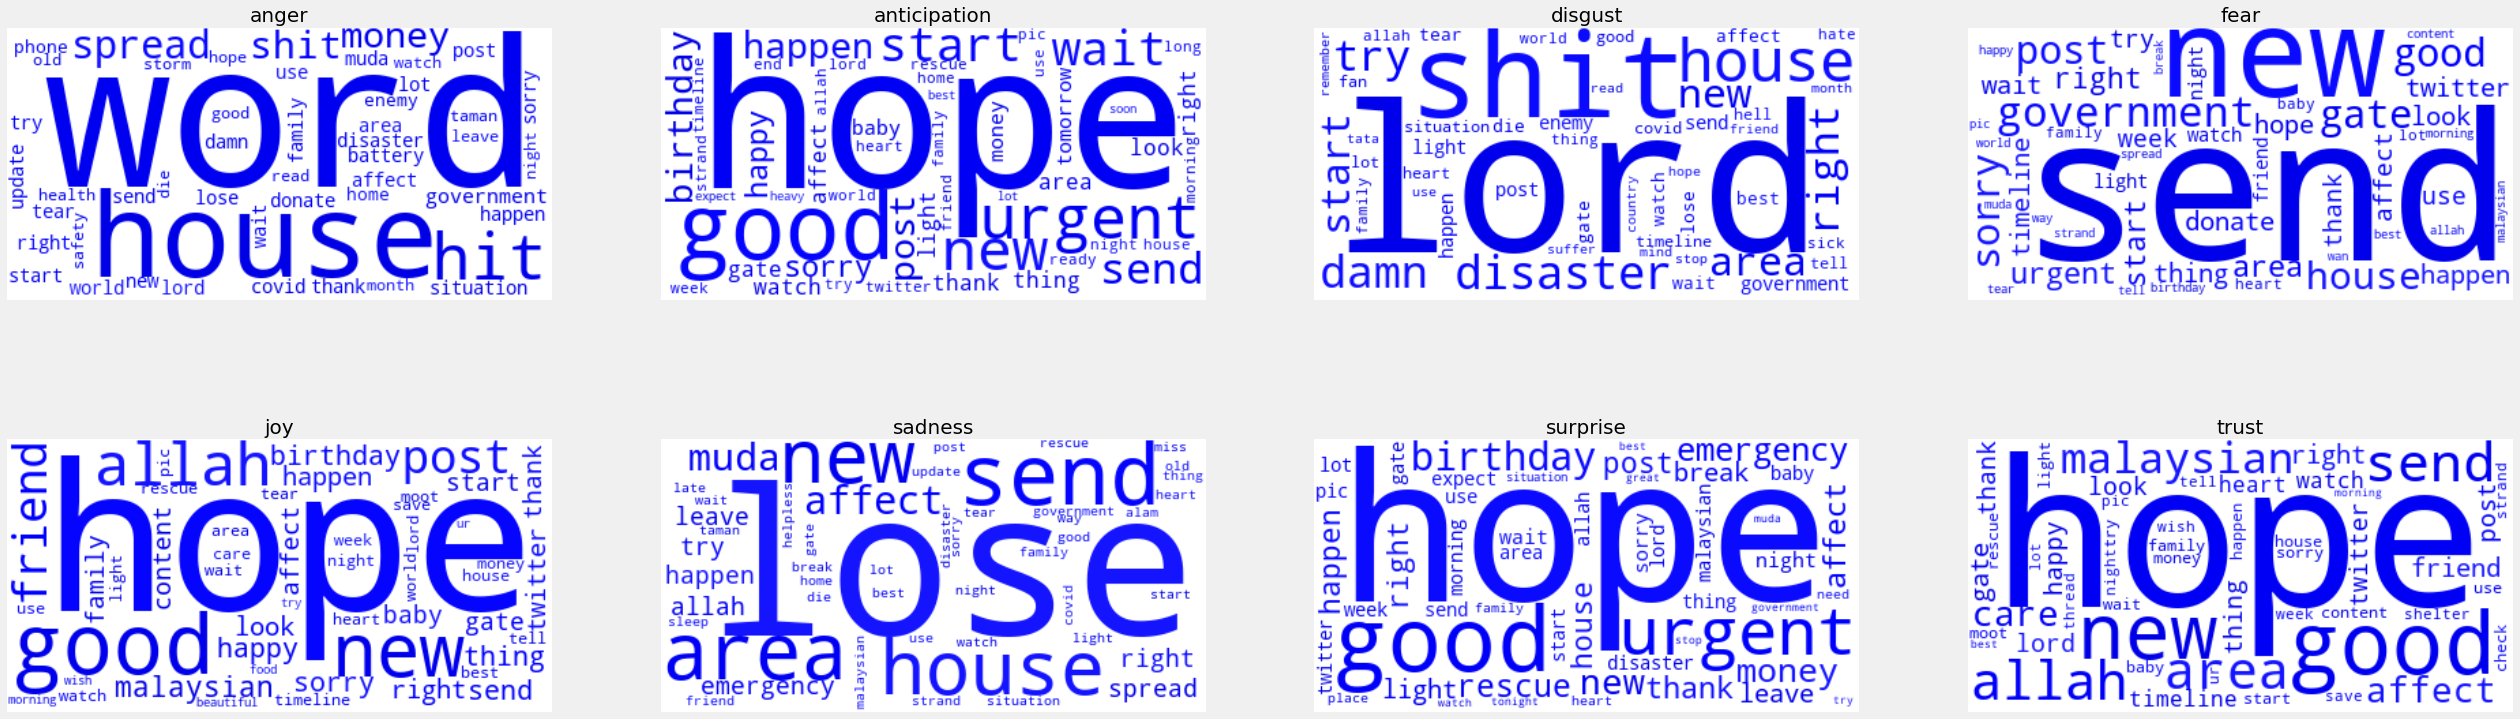

In [66]:
from wordcloud import WordCloud

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return("hsl(240,100%%, %d%%)" % np.random.randint(45,55))

english_wc = WordCloud(stopwords=english_stop_words, background_color="white", color_func = grey_color_func,
               max_font_size=150, random_state=42, max_words=50, collocations=False)

plt.rcParams['figure.figsize'] = [40, 20]

full_names = emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for index, emotion in enumerate(english_data.columns):
    english_wc.generate(english_data_clean.Tweets[emotion])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(english_wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index], fontsize = 20)
    
plt.show()

___

# Malay Word Cloud

In [67]:
malay_data_clean.index = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

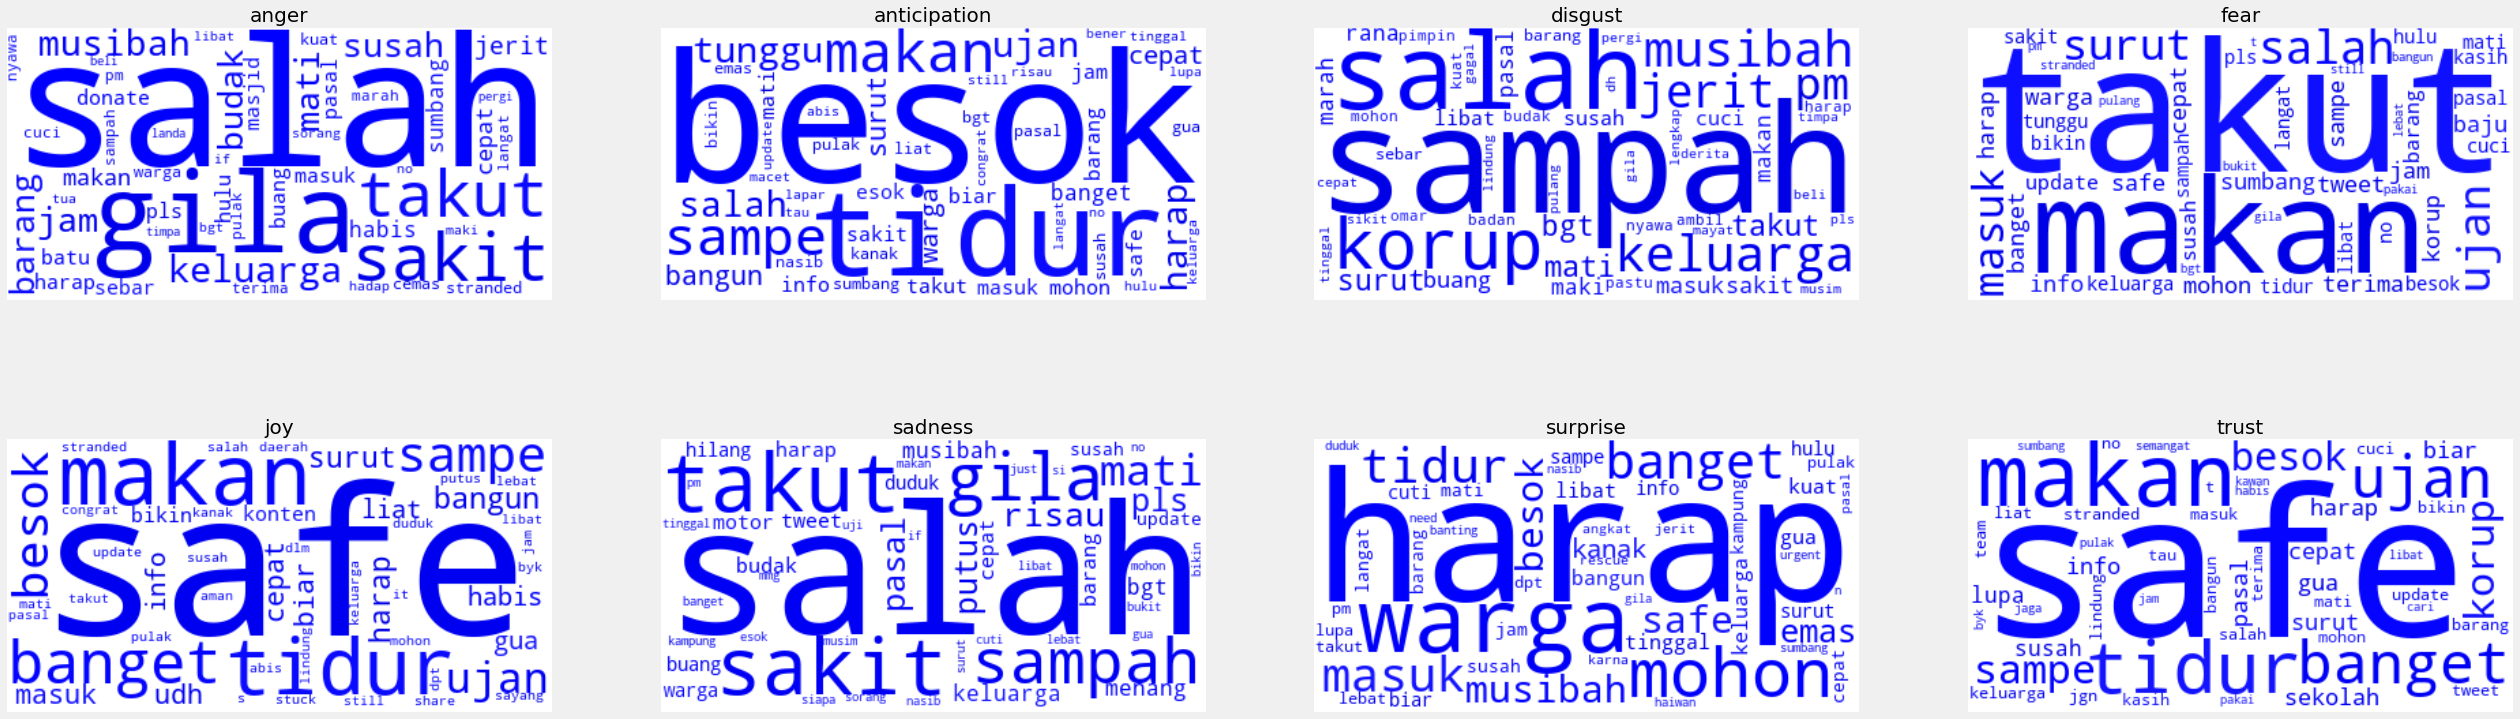

In [68]:
malay_wc = WordCloud(stopwords=malay_stop_words, background_color="white", color_func = grey_color_func,
               max_font_size=150, random_state=42, max_words=50, collocations=False)

plt.rcParams['figure.figsize'] = [40, 20]

full_names = emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for index, emotion in enumerate(malay_data.columns):
    malay_wc.generate(malay_data_clean.Tweets[emotion])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(malay_wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index], fontsize = 20)
    
plt.show()

___

# Most Frequent Terms

In [69]:
#@title One Word (Unigram)
def get_top_text_ngrams(corpus, ngrams=(1,1), nr=None):
    vec = CountVectorizer(ngram_range=ngrams).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:nr]

In [70]:
#Remove Common Words from original Cleaned Dataset
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

english_NLTK_stopwords_list = stopwords.words('english')
english_custom_stopword_list = ['you know','i mean','yo','dude','couldnt','cant',
                                'dont','doesnt','youve','im','ive','wasnt','mightnt','hadnt','hvnt','youre','wouldnt','shouldnt','arent','isnt','werent','youll','its','thats','know','people','amp','time','need','like','year','term','risk','work','gonna','gon na','u','na','sri','dm','tl','bc','cause','ya','w','taman','muda','shah','alam','hulu','langat']
english_common_words = ['flood', 'help', 'come', 'day', 'feel', 'let', 'love', 'stay', 'water', 'victim', 'make', 'think', 'god', 'want', 'guy', 'bad', 'pls', 'malaysia', 'today', 'tweet', 'open', 'life', 'really', 'say', 'safe', 'pray', 'rain']

english_final_stopword_list = english_NLTK_stopwords_list + english_custom_stopword_list + english_common_words
dfEng.Tweets = dfEng.Tweets.apply(lambda x: ' '.join(term for term in x.split() if term not in english_final_stopword_list))

print('\nCheck example:',dfEng['Tweets'].iloc[420])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Check example: last paper others high tide storm surge atmospheric river west finally publish geophysical research letter thread


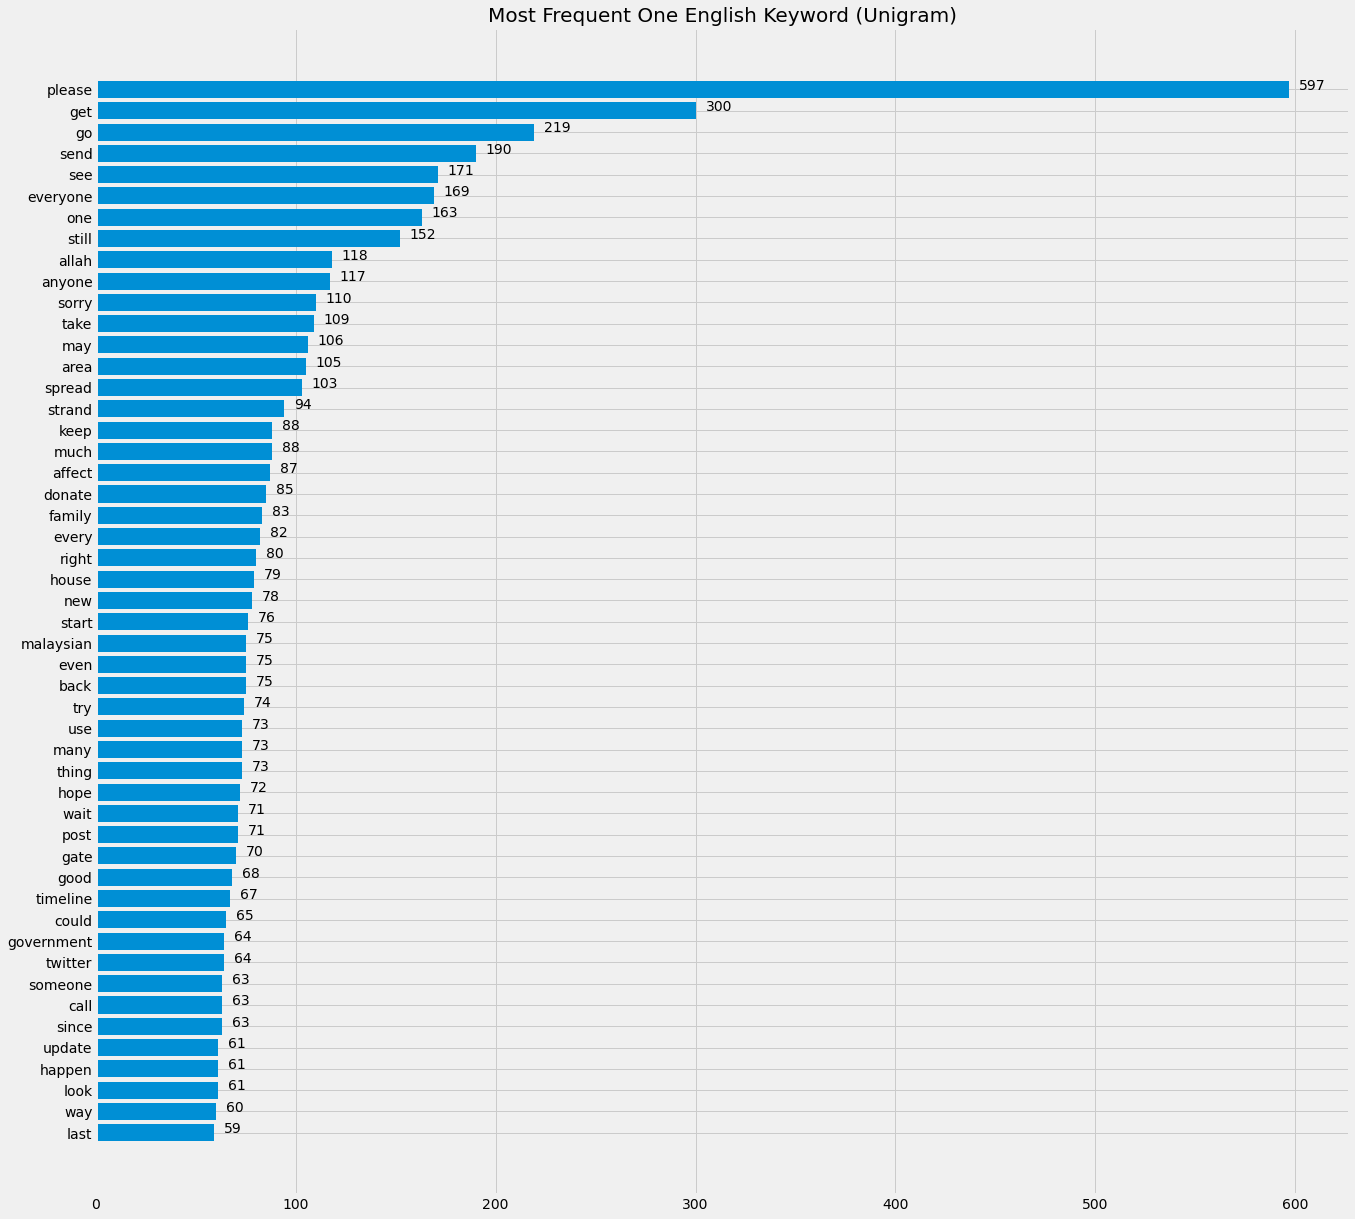

In [71]:
top_text_unigrams = get_top_text_ngrams(dfEng.Tweets, ngrams=(1,1), nr=50)
top_text_unigrams = sorted(top_text_unigrams, key=lambda x:x[1], reverse=False)
x, y = zip(*top_text_unigrams)
plt.figure(figsize=(20,20))
plt.subplot(1,1,1)
plt.barh(x,y,align="center")
plt.title("Most Frequent One English Keyword (Unigram)", fontsize=20)

for x,y in zip(x,y):
    label = "{:}".format(y)
    plt.annotate(label,
                 (y,x),
                 textcoords="offset points",
                 xytext=(10,0))

plt.show()

In [72]:
!pip install Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

malay_Sastrawi_stopwords_list = StopWordRemoverFactory()
#https://github.com/stopwords-iso/stopwords-ms/blob/master/stopwords-ms.json
malay_custom_stopword_list = ["abdul","abdullah","acara","ada","adalah","ahmad",
                              "air","akan","akhbar","akhir","aktiviti","alam","amat", "amerika","anak","anggota","antara","antarabangsa","apa","apabila","april","as","asas","asean","asia","asing","atas","atau","australia","awal","awam","bagaimanapun","bagi","bahagian","bahan","baharu","bahawa","baik","bandar","bank","banyak","barangan","baru","baru-baru","bawah","beberapa","bekas","beliau","belum","berada","berakhir","berbanding","berdasarkan","berharap","berikutan","berjaya","berjumlah","berkaitan","berkata","berkenaan","berlaku","bermula","bernama","bernilai","bersama","berubah","besar","bhd","bidang","bilion","bn","boleh","bukan","bulan","bursa","cadangan","china","dagangan","dalam","dan","dana","dapat","dari","daripada","dasar","datang","datuk","demikian","dengan","depan","derivatives","dewan","di","diadakan","dibuka","dicatatkan","dijangka","diniagakan","dis","disember","ditutup","dolar","dr","dua","dunia","ekonomi","eksekutif","eksport","empat","enam","faedah","feb","global","hadapan","hanya","harga","hari","hasil","hingga","hubungan","ia","iaitu","ialah","indeks","india","indonesia","industri","ini","islam","isnin","isu","itu","jabatan","jalan","jan","jawatan","jawatankuasa","jepun","jika","jualan","juga","julai","jumaat","jumlah","jun","juta","kadar","kalangan","kali","kami","kata","katanya","kaunter","kawasan","ke","keadaan","kecil","kedua","kedua-dua","kedudukan","kekal","kementerian","kemudahan","kenaikan","kenyataan","kepada","kepentingan","keputusan","kerajaan","kerana","kereta","kerja","kerjasama","kes","keselamatan","keseluruhan","kesihatan","ketika","ketua","keuntungan","kewangan","khamis","kini","kira-kira","kita","klci","klibor","komposit","kontrak","kos","kuala","kuasa","kukuh","kumpulan","lagi","lain","langkah","laporan","lebih","lepas","lima","lot","luar","lumpur","mac","mahkamah","mahu","majlis","makanan","maklumat","malam","malaysia","mana","manakala","masa","masalah","masih","masing-masing","masyarakat","mata","media","mei","melalui","melihat","memandangkan","memastikan","membantu","membawa","memberi","memberikan","membolehkan","membuat","mempunyai","menambah","menarik","menawarkan","mencapai","mencatatkan","mendapat","mendapatkan","menerima","menerusi","mengadakan","mengambil","mengenai","menggalakkan","menggunakan","mengikut","mengumumkan","mengurangkan","meningkat","meningkatkan","menjadi","menjelang","menokok","menteri","menunjukkan","menurut","menyaksikan","menyediakan","mereka","merosot","merupakan","mesyuarat","minat","minggu","minyak","modal","mohd","mudah","mungkin","naik","najib","nasional","negara","negara-negara","negeri","niaga","nilai","nov","ogos","okt","oleh","operasi","orang","pada","pagi","paling","pameran","papan","para","paras","parlimen","parti","pasaran","pasukan","pegawai","pejabat","pekerja","pelabur","pelaburan","pelancongan","pelanggan","pelbagai","peluang","pembangunan","pemberita","pembinaan","pemimpin","pendapatan","pendidikan","penduduk","penerbangan","pengarah","pengeluaran","pengerusi","pengguna","pengurusan","peniaga","peningkatan","penting","peratus","perdagangan","perdana","peringkat","perjanjian","perkara","perkhidmatan","perladangan","perlu","permintaan","perniagaan","persekutuan","persidangan","pertama","pertubuhan","pertumbuhan","perusahaan","peserta","petang","pihak","pilihan","pinjaman","polis","politik","presiden","prestasi","produk","program","projek","proses","proton","pukul","pula","pusat","rabu","rakan","rakyat","ramai","rantau","raya","rendah","ringgit","rumah","sabah","sahaja","saham","sama","sarawak","satu","sawit","saya","sdn","sebagai","sebahagian","sebanyak","sebarang","sebelum","sebelumnya","sebuah","secara","sedang","segi","sehingga","sejak","sekarang","sektor","sekuriti","selain","selama","selasa","selatan","selepas","seluruh","semakin","semalam","semasa","sementara","semua","semula","sen","sendiri","seorang","sepanjang","seperti","sept","september","serantau","seri","serta","sesi","setiap","setiausaha","sidang","singapura","sini","sistem","sokongan","sri","sudah","sukan","suku","sumber","supaya","susut","syarikat","syed","tahap","tahun","tan","tanah","tanpa","tawaran","teknologi","telah","tempat","tempatan","tempoh","tenaga","tengah","tentang","terbaik","terbang","terbesar","terbuka","terdapat","terhadap","termasuk","tersebut","terus","tetapi","thailand","tiada","tidak","tiga","timbalan","timur","tindakan","tinggi","tun","tunai","turun","turut","umno","unit","untuk","untung","urus","usaha","utama","walaupun","wang","wanita","wilayah","yang","i","so","to","this","for","nya","x","geng","selangor","pahang","a","you","of","my","shah","pon","but","sbb","mcm","time","korang","tp","aja","nang","area","eh","kl","or","kg","gak","kalo","in","pas","sih","gue","udah","jakarta","lg","jd","sih","gw","ku","hulu","langat"]
malay_common_words = ['banjir', 'mangsa', 'bantu', 'allah', 'selamat', 'and', 'moga', 'hujan', 'hati', 'tengok', 'ga', 'muda', 'taman', 'please', 'baca', 'raja', 'help', 'stay', 'bencana', 'the', 'org', 'sedih', 'doa']

malay_final_stopword_list = malay_Sastrawi_stopwords_list.get_stop_words() + malay_custom_stopword_list + malay_common_words
dfMly.Tweets = dfMly.Tweets.apply(lambda x: ' '.join(term for term in x.split() if term not in malay_final_stopword_list))

print('\nCheck example:',dfMly['Tweets'].iloc[420])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 4.8 MB/s eta 0:00:00

Check example: refresh twitter berita bad new


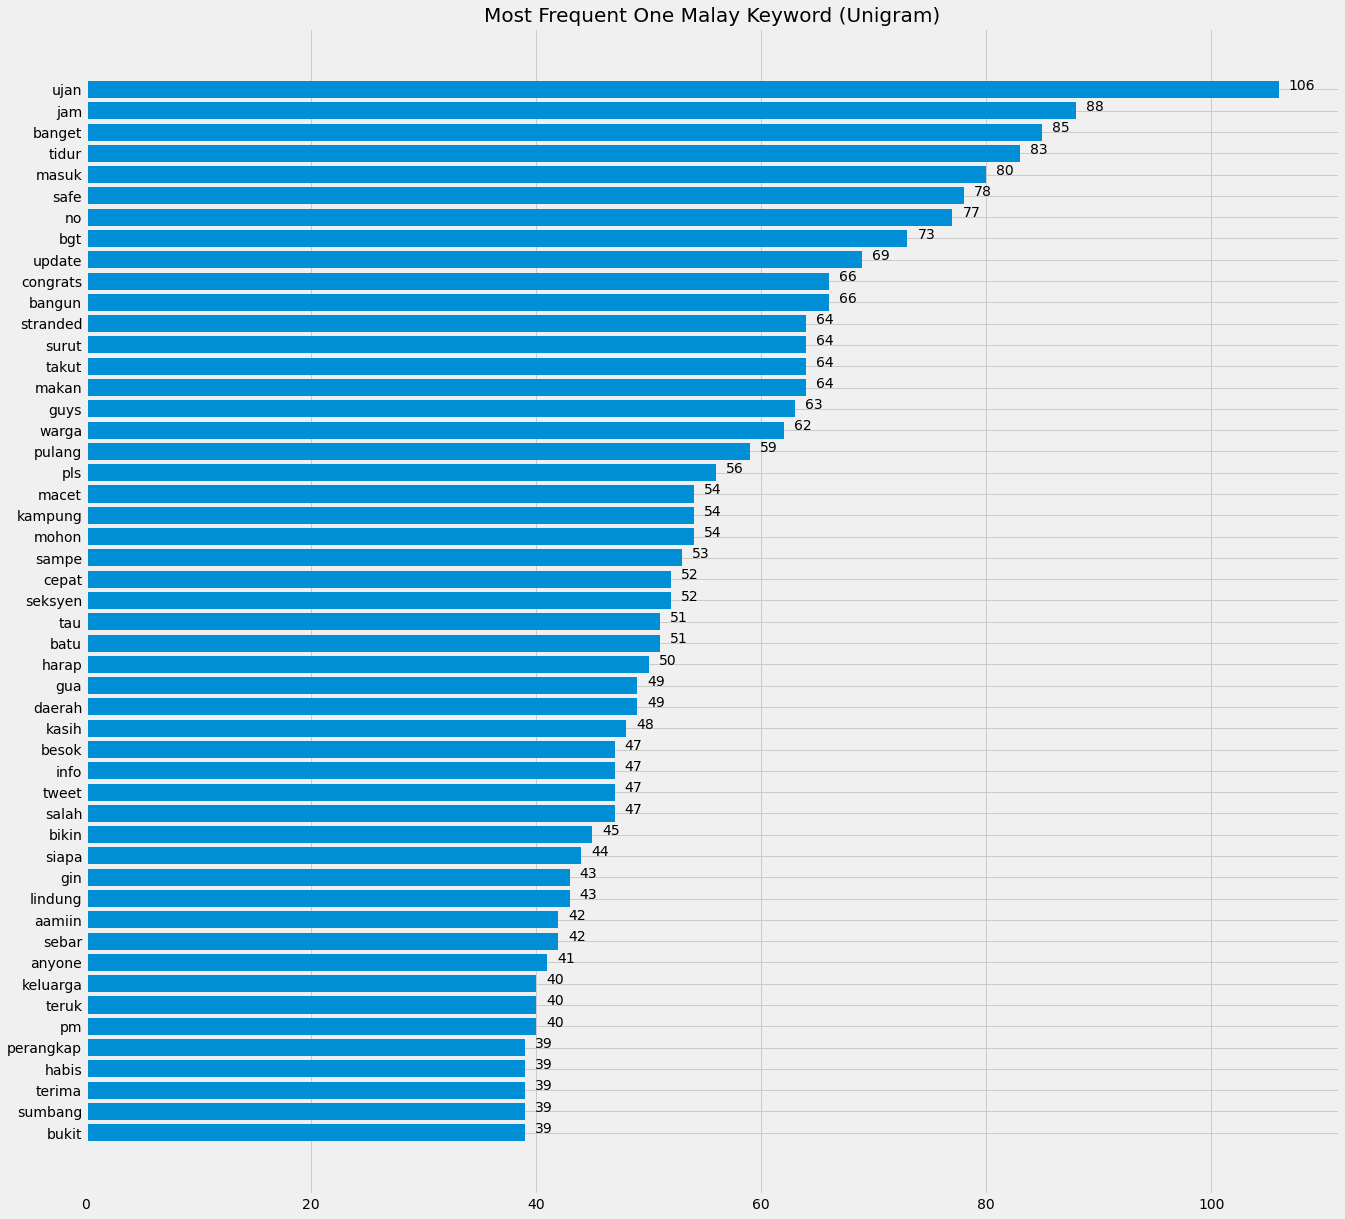

In [73]:
top_text_unigrams = get_top_text_ngrams(dfMly.Tweets, ngrams=(1,1), nr=50)
top_text_unigrams = sorted(top_text_unigrams, key=lambda x:x[1], reverse=False)
x, y = zip(*top_text_unigrams)
plt.figure(figsize=(20,20))
plt.subplot(1,1,1)
plt.barh(x,y,align="center")
plt.title("Most Frequent One Malay Keyword (Unigram)", fontsize=20)

for x,y in zip(x,y):
    label = "{:}".format(y)
    plt.annotate(label, # this is the text
                 (y,x), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,0)) # distance from text to points (x,y)

plt.show()

___

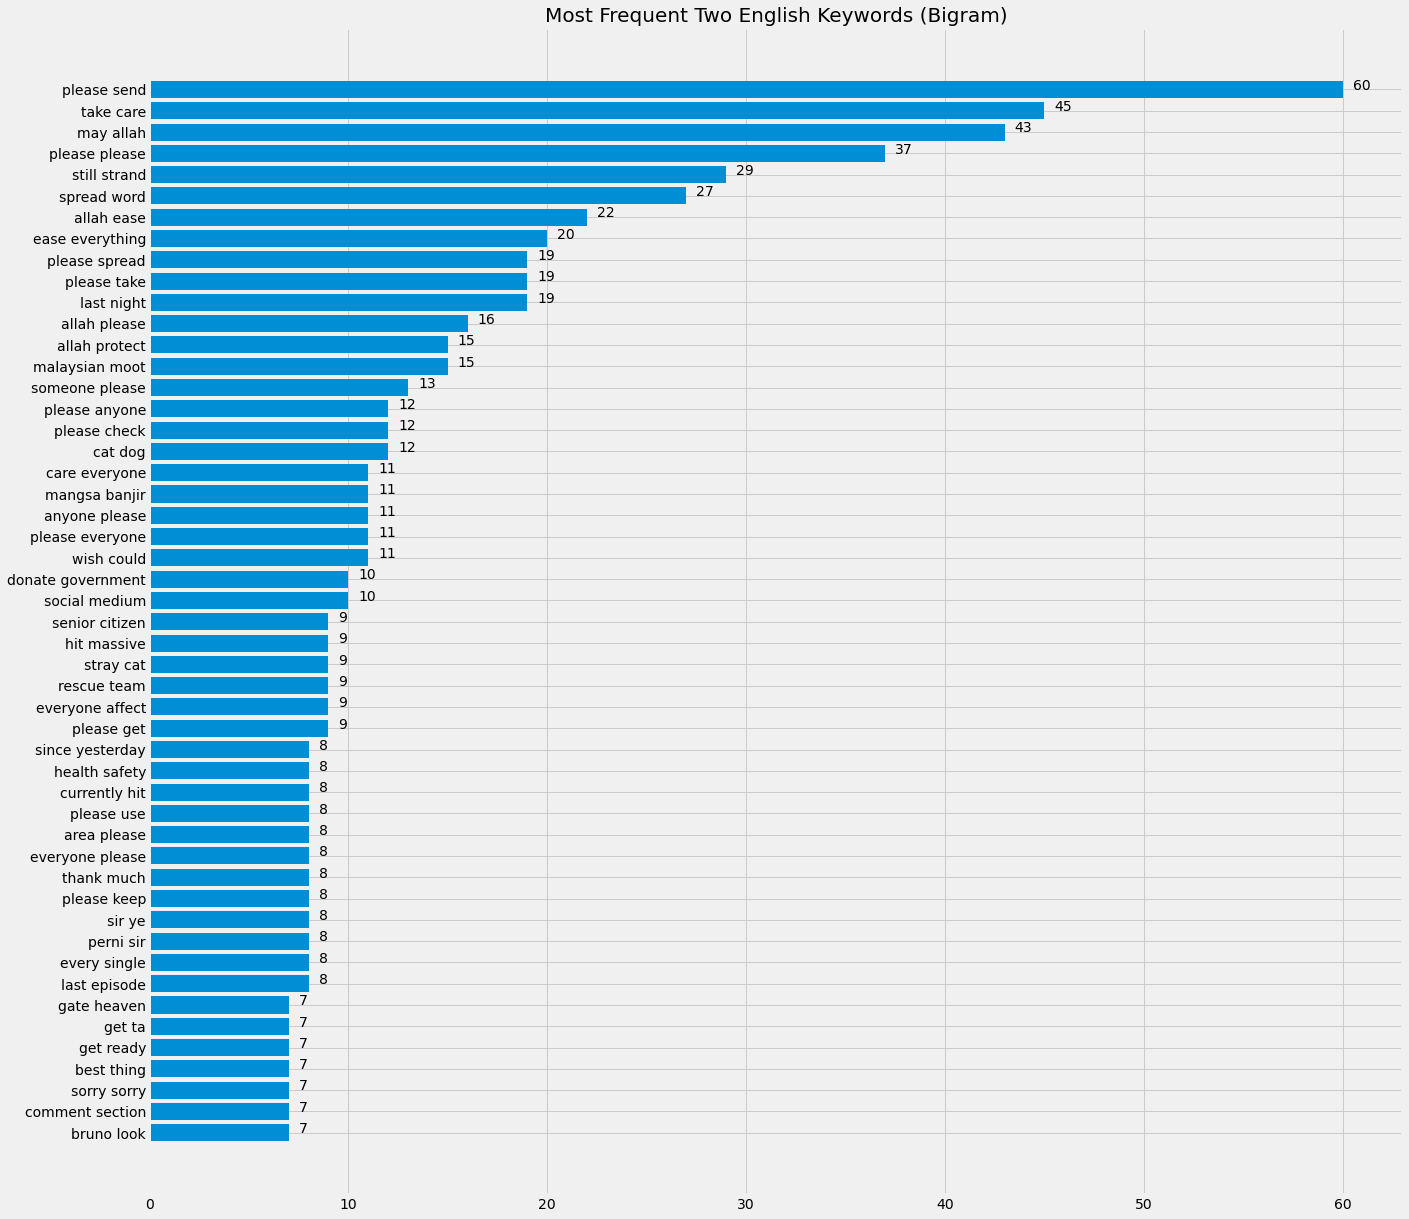

In [74]:
#@title Two Words (Bigram)
top_text_bigrams = get_top_text_ngrams(dfEng.Tweets, ngrams=(2,2), nr=50)
top_text_bigrams = sorted(top_text_bigrams, key=lambda x:x[1], reverse=False)
x, y = zip(*top_text_bigrams)
plt.figure(figsize=(20,20))
plt.subplot(1,1,1)
plt.barh(x,y,align="center")
plt.title("Most Frequent Two English Keywords (Bigram)", fontsize=20)

for x,y in zip(x,y):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (y,x), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,0)) # distance from text to points (x,y)

plt.show()

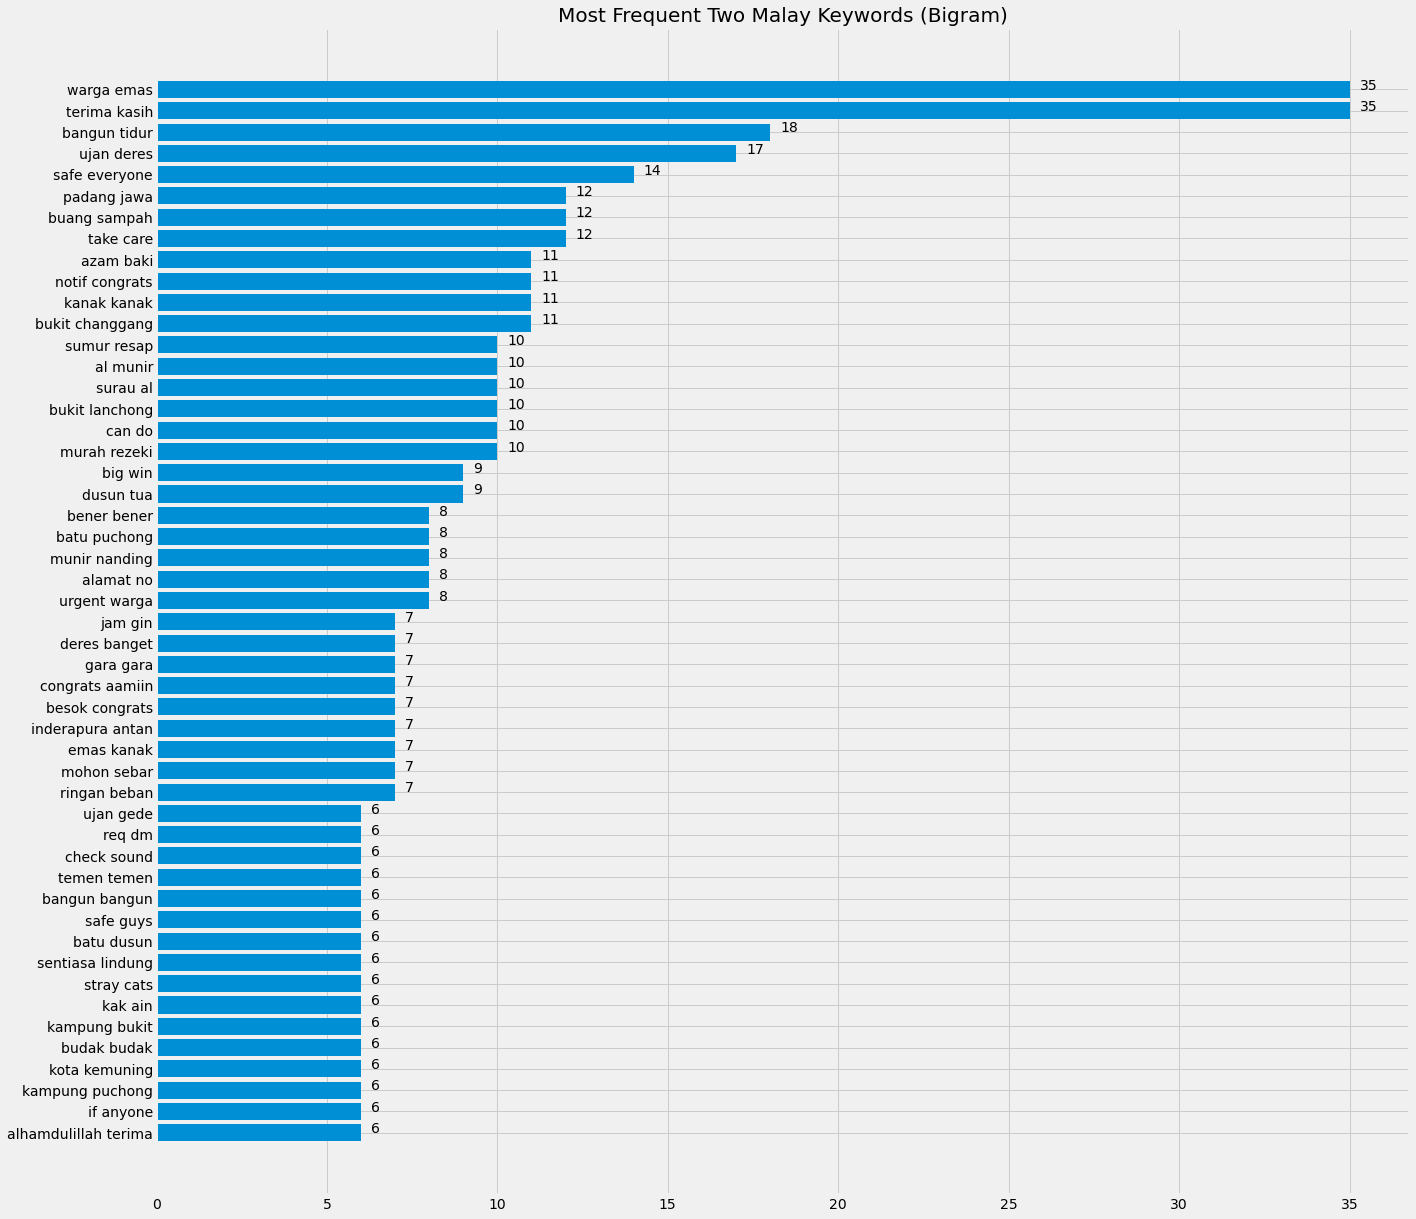

In [75]:
top_text_bigrams = get_top_text_ngrams(dfMly.Tweets, ngrams=(2,2), nr=50)
top_text_bigrams = sorted(top_text_bigrams, key=lambda x:x[1], reverse=False)
x, y = zip(*top_text_bigrams)
plt.figure(figsize=(20,20))
plt.subplot(1,1,1)
plt.barh(x,y,align="center")
plt.title("Most Frequent Two Malay Keywords (Bigram)", fontsize=20)

for x,y in zip(x,y):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (y,x), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,0)) # distance from text to points (x,y)

plt.show()

___

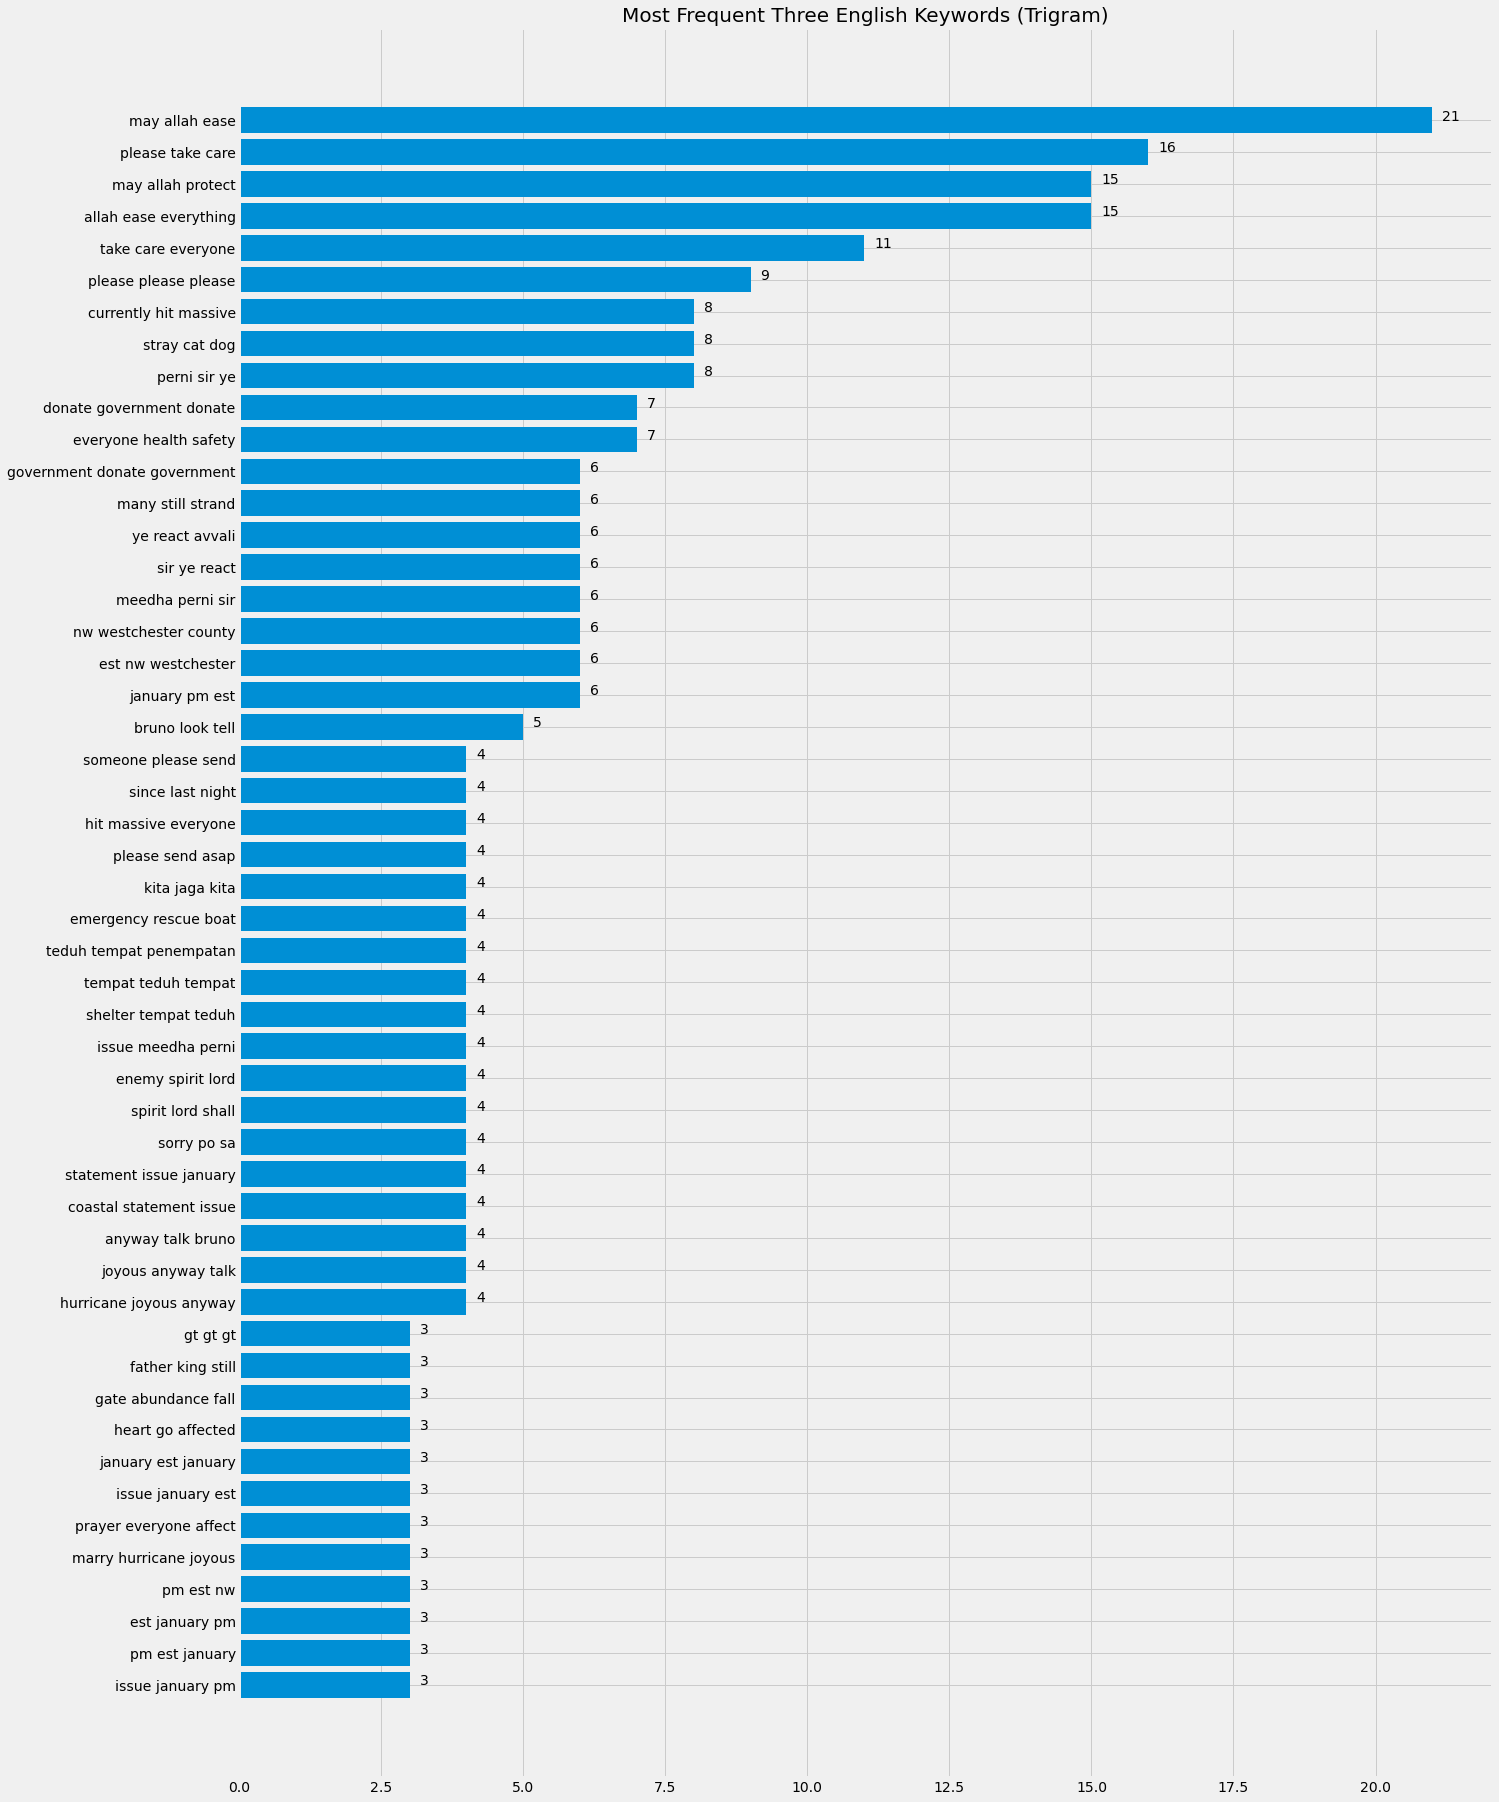

In [76]:
#@title Three Words (Trigram)
top_text_trigrams = get_top_text_ngrams(dfEng.Tweets, ngrams=(3,3), nr=50)
top_text_trigrams = sorted(top_text_trigrams, key=lambda x:x[1], reverse=False)
x, y = zip(*top_text_trigrams)
plt.figure(figsize=(20,30))
plt.subplot(1,1,1)
plt.barh(x,y,align="center")
plt.title("Most Frequent Three English Keywords (Trigram)", fontsize=20)
for x,y in zip(x,y):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (y,x), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,0)) # distance from text to points (x,y)

plt.show()

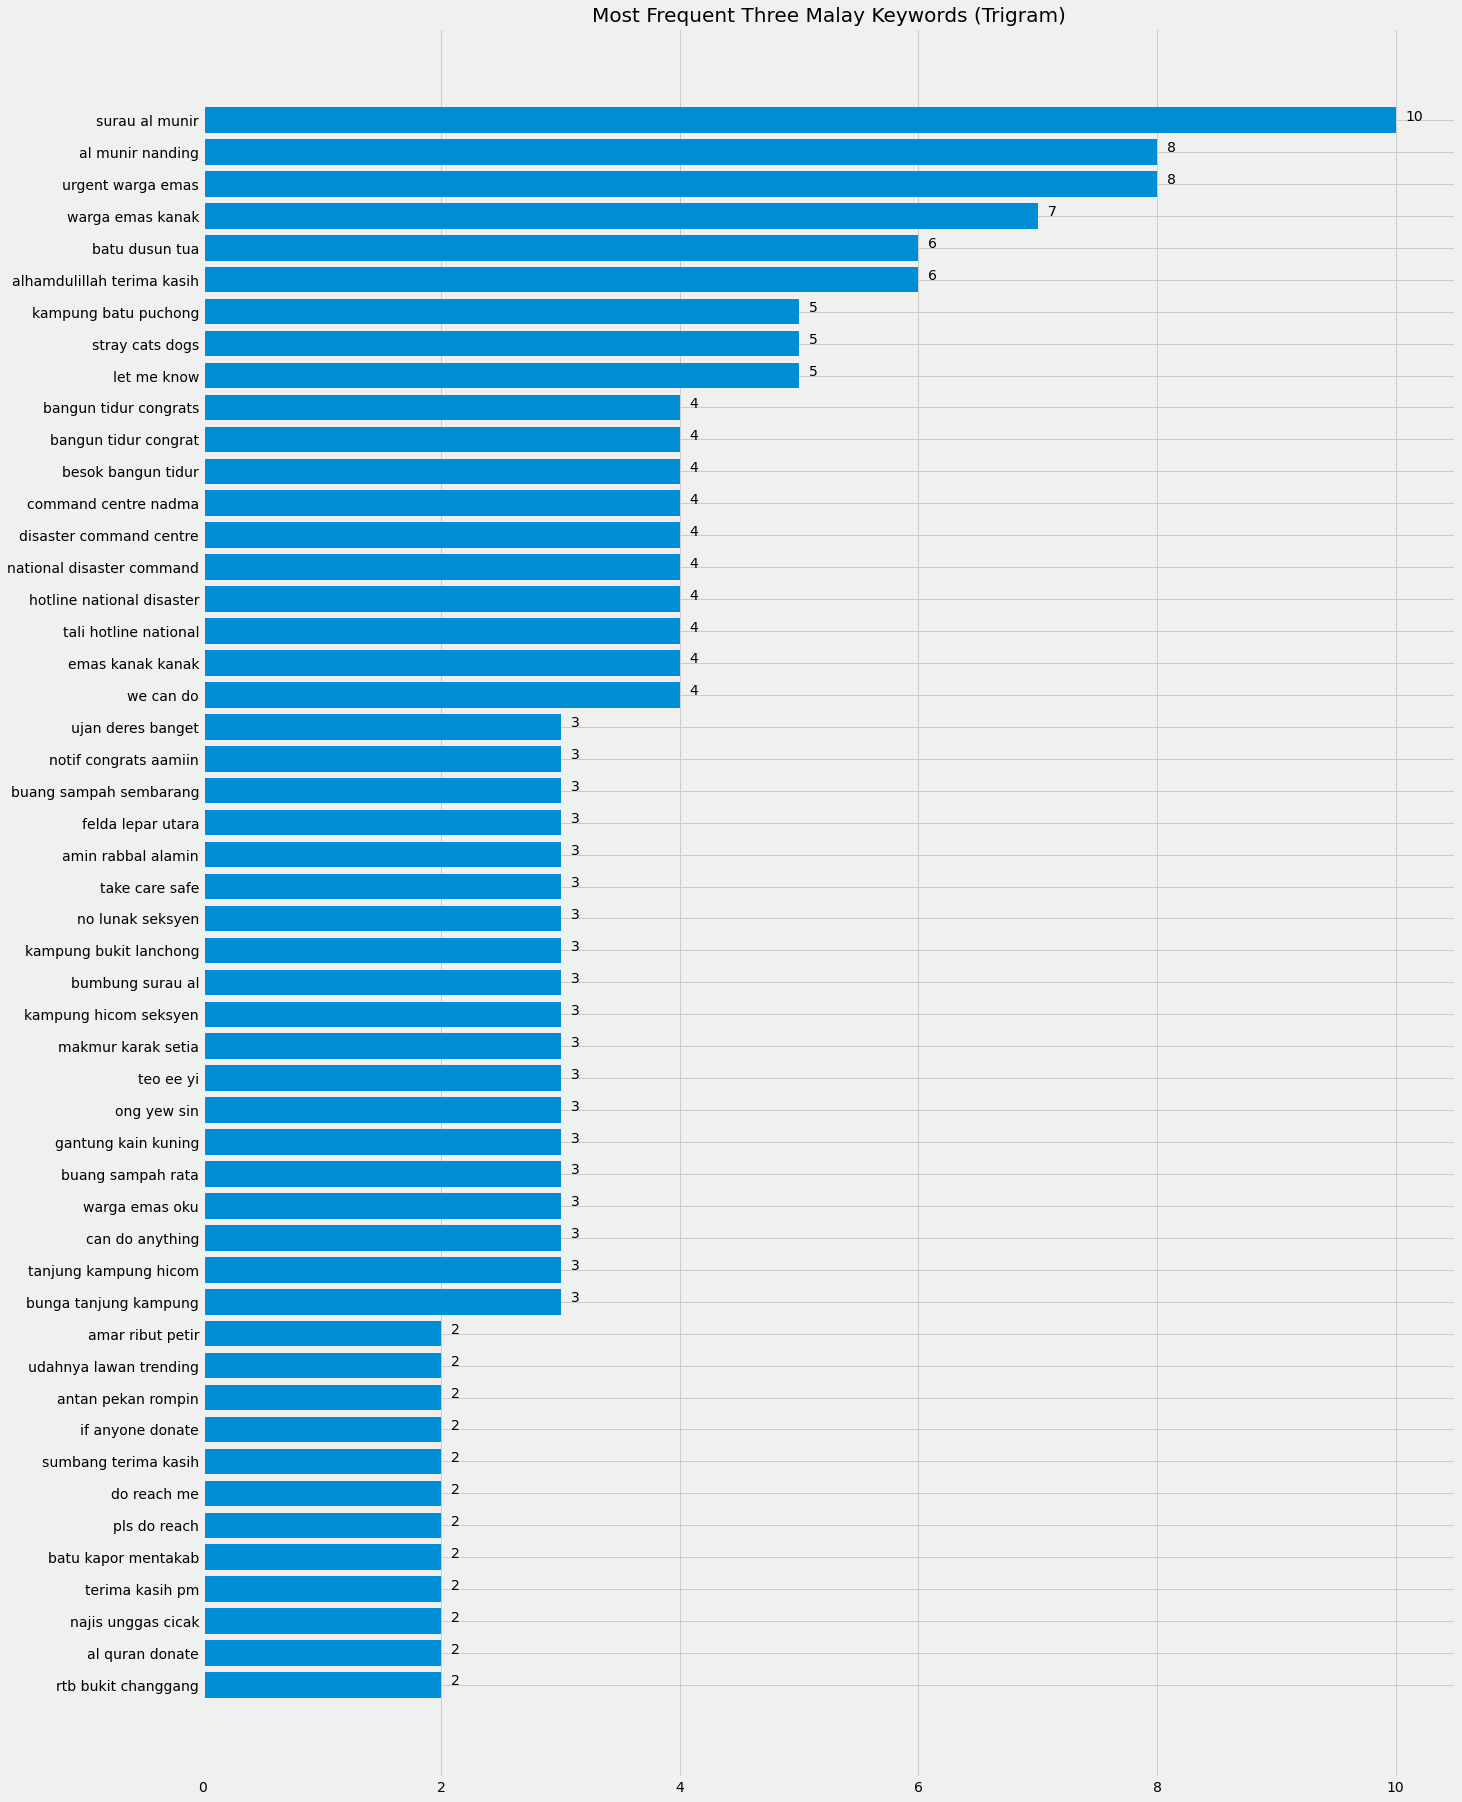

In [77]:
top_text_trigrams = get_top_text_ngrams(dfMly.Tweets, ngrams=(3,3), nr=50)
top_text_trigrams = sorted(top_text_trigrams, key=lambda x:x[1], reverse=False)
x, y = zip(*top_text_trigrams)
plt.figure(figsize=(20,30))
plt.subplot(1,1,1)
plt.barh(x,y,align="center")
plt.title("Most Frequent Three Malay Keywords (Trigram)", fontsize=20)
for x,y in zip(x,y):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (y,x), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,0)) # distance from text to points (x,y)

plt.show()

___

In [78]:
#@title Export Final Cleaned Datasets as .pkl format
import pickle
dfEng.to_pickle("DSPEnglishTweetsCleanedV2.pkl")
dfMly.to_pickle("DSPMalayTweetsCleanedV2.pkl")

___